In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

# DATA PREPARATION

In [3]:
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [4]:
print(df.columns) #each image stored in a row, 784 pixels

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [5]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [7]:
X=data[:,1:]
Y=data[:,0]
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [8]:
split=int(0.8*X.shape[0])
print(split)

X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


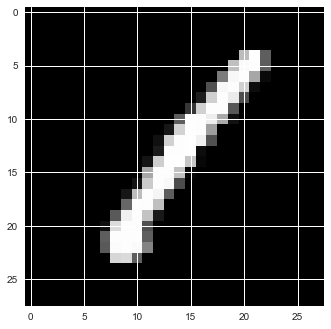

1


In [9]:
#Visualise some samples

def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(X_train[0])
print(Y_train[0])

# KNN

In [10]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2)) #basically the distance formula

def knn(X,Y,queryPoint,k=5):#k=5 no of neighbours in consideration
    vals=[]
    m=X.shape[0]
    
    for i in range(m): #Run over all the rows
        d=dist(queryPoint,X[i]) # here a point is a whole row
        vals.append((d,Y[i])) #labels, dist at first place -for sort coz sort based on 1st parameter, label- X or O
        
        
    vals=sorted(vals)
    vals=vals[:k]
    print(vals)
    vals=np.array(vals)
    print(vals) 
    new_vals=np.unique(vals[:,1],return_counts=True) #unique labels, then return their count
    print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index] #prediction
    return pred

# MAKE PREDICTIONS

In [11]:
pred= knn(X_train,Y_train,X_test[0])
print(int(pred))

[(1213.3688639486345, 0), (1235.2032221460563, 0), (1328.6357664913285, 0), (1400.1228517526597, 0), (1411.8261224385956, 0)]
[[1213.36886395    0.        ]
 [1235.20322215    0.        ]
 [1328.63576649    0.        ]
 [1400.12285175    0.        ]
 [1411.82612244    0.        ]]
(array([0.]), array([5]))
0


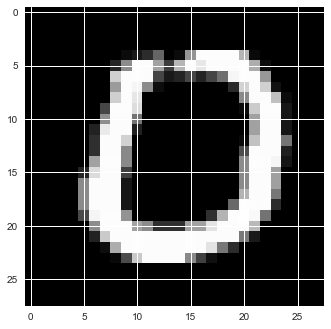

0


In [12]:
drawImg(X_test[0])
print(Y_test[0])

In [13]:
print(X_test.shape[0])

8400


In [1]:
#Write one method to compute accuracy of knn over the test set!
def accuracy():
    count=0;
    for i in range(X_test.shape[0]):
       pred= knn(X_train,Y_train,X_test[i]) 
       if(int(pred)==Y_test[i]):
            count=count+1
            
     
    accurate= (count/(X_test.shape[0]))*100
    print(accurate)
    print(count)

In [15]:
#accuracy()